In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from CSV file
projectPath_save = "./save/"
projectPath = "./data/"
file_path = projectPath+ "timeVideo3.csv"

In [ ]:
df = pd.read_csv(file_path)
df

,TIME,behaviour
0,00:00:00,NIP_IN
1,00:00:15,NIP_IN
2,00:00:30,NIP_IN
3,00:00:45,NIP_IN
4,00:01:00,NIP_IN
...,...,...
799,03:19:45,NIP_OUT
800,03:20:00,AM
801,03:20:15,AM
802,03:20:30,AM


In [ ]:
df = df.dropna()
df

,TIME,behaviour
0,00:00:00,NIP_IN
1,00:00:15,NIP_IN
2,00:00:30,NIP_IN
3,00:00:45,NIP_IN
4,00:01:00,NIP_IN
...,...,...
799,03:19:45,NIP_OUT
800,03:20:00,AM
801,03:20:15,AM
802,03:20:30,AM


In [ ]:
#Counting the number of frames per behaviour

beh = df.groupby("behaviour").size()
beh

,0
behaviour,
AM,17
BEND,58
BEND_OPP,13
BK_SW,6
BN,17
CHASE_FLEE,23
DAN_CIRC,53
FAN,102
FS,18


In [ ]:
total_frames = int(len(df))
total_frames

577

In [ ]:
perc_frames = beh/total_frames*100
perc_frames

,0
behaviour,
AM,2.946274
BEND,10.051993
BEND_OPP,2.253033
BK_SW,1.039861
BN,2.946274
CHASE_FLEE,3.986135
DAN_CIRC,9.185442
FAN,17.677643
FS,3.119584


In [ ]:
perc_frames.info()

<class 'pandas.core.series.Series'>
Index: 19 entries, AM to SPIT
Series name: None
Non-Null Count  Dtype  
--------------  -----  
19 non-null     float64
dtypes: float64(1)
memory usage: 860.0+ bytes


Text(0, 0.5, '% of frames')

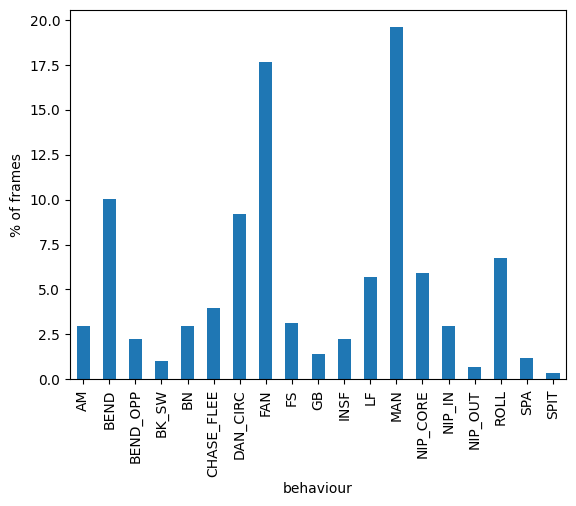

In [ ]:
#Explorative bar plot
perc_frames.plot.bar().set_ylabel('% of frames')

In [ ]:
# Define the categories
Courtship_all = ['BEND', 'DAN_CIRC', 'ROLL', 'GB', 'LF', 'BK_SW', 'BEND_OPP', 'H_DOWN', 'H_UP', 'MAF', 'UP', 'SPA']
Nest_mantainance = ['SA', 'NIP_OUT', 'NIP_IN', 'BN', 'AM', 'LAND', 'MAN' ]
Egg_care = ['FAN', 'NIP_CORE', 'INSF']
Agonism = ['CHASE_FLEE']

In [ ]:
# Define dictionary behaviour:category
behavior_to_type_map = {
    'BEND': 'Courtship', 'DAN_CIRC' : 'Courtship', 'ROLL': 'Courtship', 'GB': 'Courtship',
    'LF' : 'Courtship', 'BK_SW' : 'Courtship', 'BEND_OPP' : 'Courtship', 'H_DOWN' : 'Courtship',
    'H_UP' : 'Courtship', 'MAF' : 'Courtship', 'UP' : 'Courtship', 'SA' : 'Nest_mantainance', 'NIP_OUT' : 'Nest_mantainance', 'NIP_IN' : 'Nest_mantainance',
    'BN' : 'Nest_mantainance', 'AM' : 'Nest_mantainance', 'LAND' : 'Nest_mantainance', 'MAN' : 'Nest_mantainance',
    'FAN' : 'Egg_care', 'SPA' : 'Courtship', 'NIP_CORE' : 'Egg_care', 'INSF' : 'Egg_care',
    'CHASE_FLEE' : 'Agonism'
}

In [ ]:
#series to datarfame
dfperc_frames = pd.DataFrame(perc_frames)

In [ ]:
# Add column "Group" using the dictionary
dfperc_frames['Group'] = dfperc_frames.index.map(behavior_to_type_map)

In [ ]:
# Remove behaviours not in categories
prova = dfperc_frames.dropna()

In [ ]:
prova.columns = ['%', 'Group']

In [ ]:
# Map of colors per category
color_map = {
    'Egg_care': 'blue',
    'Nest_mantainance': 'green',
    'Courtship': 'pink',
    'Agonism': 'purple'
}

In [ ]:
#apply the map of colors to the column Group
colors = prova['Group'].map(color_map)

In [ ]:
#sort values
df_sorted = prova.sort_values(by=['Group','%'], ascending=[True, False])
df_sorted

,%,Group
behaviour,,
CHASE_FLEE,3.986135,Agonism
BEND,10.051993,Courtship
DAN_CIRC,9.185442,Courtship
ROLL,6.759099,Courtship
LF,5.719237,Courtship
BEND_OPP,2.253033,Courtship
GB,1.386482,Courtship
SPA,1.213172,Courtship
BK_SW,1.039861,Courtship


In [ ]:
#apply the color map to the colomn Group
bar_colors = df_sorted['Group'].map(color_map)

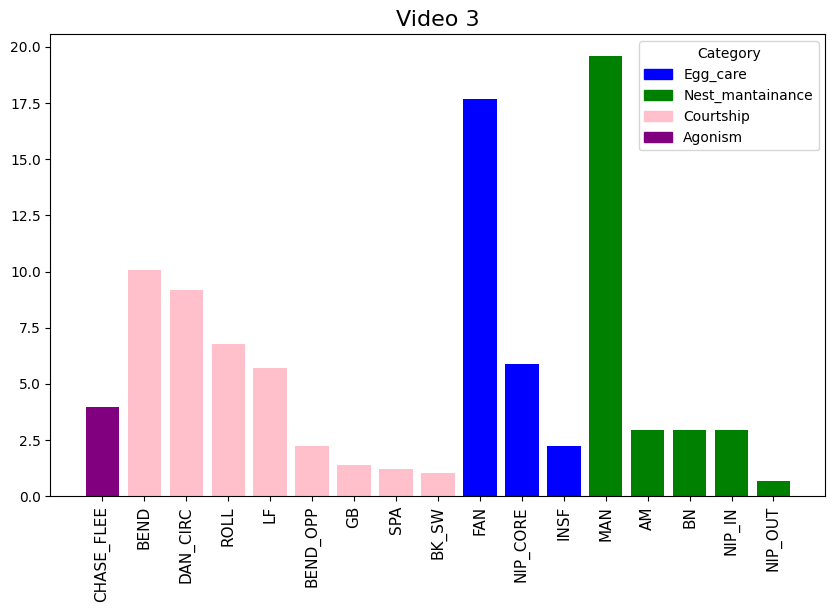

In [ ]:
#Create graph

plt.figure(figsize=(10, 6))
plt.bar(df_sorted.index, df_sorted['%'], color=bar_colors)

# Rotate ticks 90 degrees
plt.xticks(rotation=90, fontsize=11)


plt.title('Video 3', fontsize=16)

handles = [plt.Rectangle((0,0),1,1, color=color_map[tipo]) for tipo in color_map]
labels = color_map.keys()
plt.legend(handles, labels, title='Category')

#save
plt.savefig(projectPath_save + 'timeBudgetV3.png')
plt.savefig(projectPath_save + 'timeBudgetV3.svg')

plt.show()

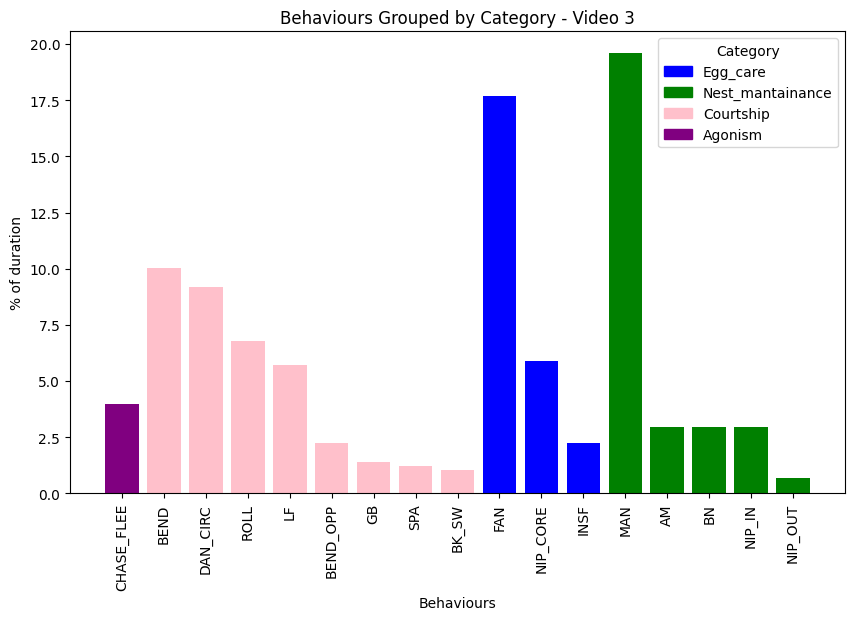

In [ ]:


# Creazione di un grafico a barre con i dati ordinati
plt.figure(figsize=(10, 6))
plt.bar(df_sorted.index, df_sorted['%'], color=bar_colors)

# Ruota le etichette dell'asse x a 90 gradi (verticale)
plt.xticks(rotation=90)

plt.xlabel('Behaviours')
plt.ylabel('% of duration')
plt.title('Behaviours Grouped by Category - Video 3')

# Aggiungi una legenda personalizzata
handles = [plt.Rectangle((0,0),1,1, color=color_map[tipo]) for tipo in color_map]
labels = color_map.keys()
plt.legend(handles, labels, title='Category')
plt.savefig(projectPath_save + 'ORDtimeBudgetGroupedPercV3.png')
plt.savefig(projectPath_save + 'ORDtimeBudgetGroupedPercV3.svg')
# Mostra il grafico
plt.show()


In [ ]:
#summing categories
group_perc = prova.groupby('Group')['%'].sum()

In [ ]:
group_perc

,%
Group,
Agonism,3.986135
Courtship,37.608319
Egg_care,25.823224
Nest_mantainance,29.116118


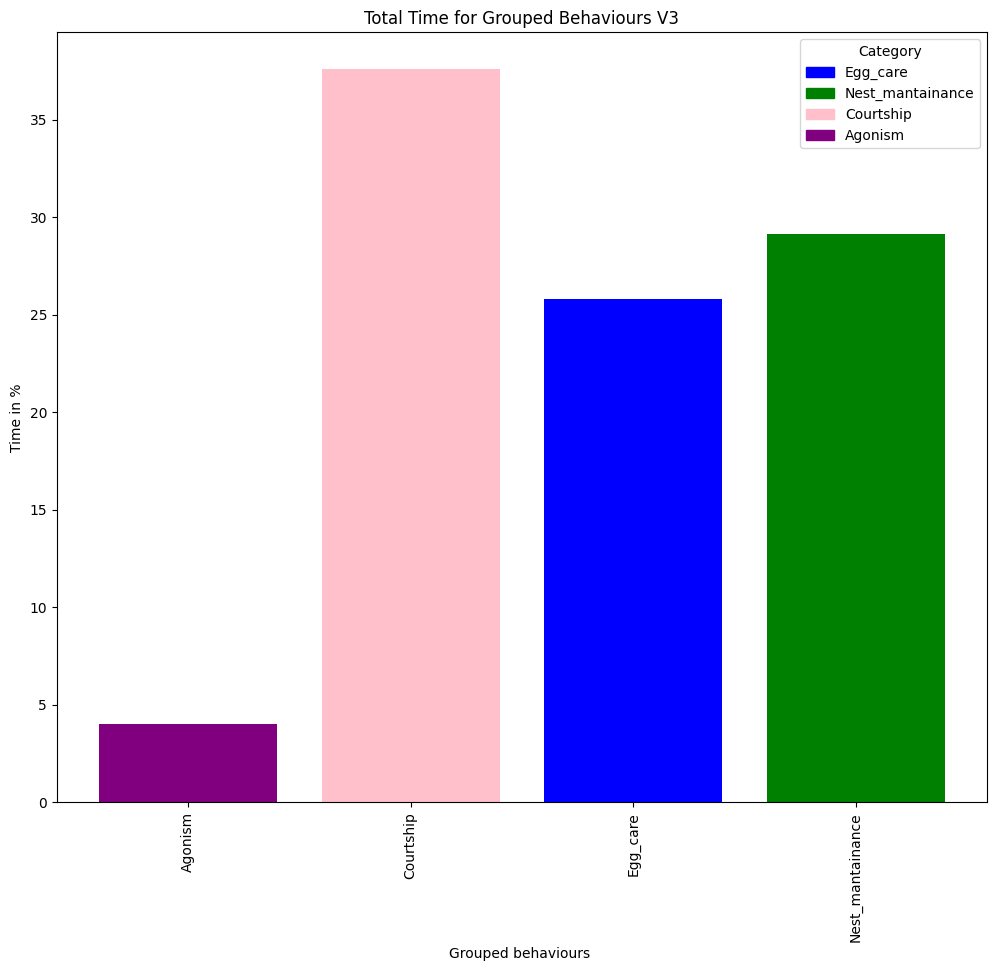

In [ ]:
# Graph

colori_barre = ['purple', 'pink', 'blue', 'green']

plt.figure(figsize=(12, 10))
plt.bar(group_perc.index, group_perc.values, color = colori_barre) # Use .values to access the summed values

plt.xticks(rotation=90)

plt.xlabel('Grouped behaviours ')
plt.ylabel('Time in %')
plt.title('Total Time for Grouped Behaviours V3')


handles = [plt.Rectangle((0,0),1,1, color=color_map[tipo]) for tipo in color_map]
labels = color_map.keys()
plt.legend(handles, labels, title='Category')
plt.savefig(projectPath_save + 'timeBudgetGroupedSumPercV3.png')

plt.show()
